## Daily Challenge W4_D3

### Breast Cancer Prediction – Complete Workflow

1. Load and inspect the data
2. Clean and preprocess the data
3. Visualize the diagnosis distribution
4. Split and normalize the data
5. Train and evaluate 4 models
6. Compare the accuracies

#### 1. Load and Inspect the Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np

In [13]:
# Load the dataset
df = pd.read_csv("data.csv")

In [14]:
# Display dataset shape
print("Dataset shape:", df.shape)

Dataset shape: (569, 33)


In [15]:
# Show the first rows
print(df.head())

# Show column data types
print(df.dtypes)

# Show basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

#### 2. Data Cleaning

In [16]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 32', 'id'], axis=1)

# Confirm columns are dropped
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


#### 3. Visualize Diagnosis Distribution

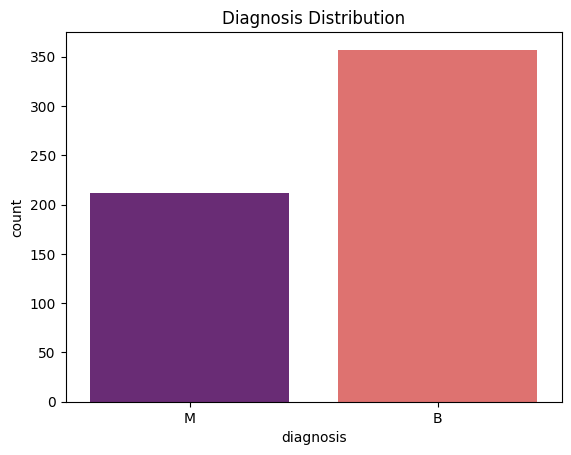

In [21]:
# Use hue to assign colors and avoid the warning
sns.countplot(x='diagnosis', hue='diagnosis', data=df, palette='magma', legend=False)
plt.title('Diagnosis Distribution')
plt.show()

##### Diagnosis Distribution Interpretation

The countplot above shows the distribution of diagnosis categories in the dataset:

- **M (Malignant):** Approximately 212 cases.
- **B (Benign):** Approximately 357 cases.

**Interpretation:**
The dataset is slightly imbalanced, with benign cases representing about 63% of the total observations. This imbalance should be considered when evaluating model performance. For example, a classifier could achieve high accuracy by predicting "benign" most of the time. Therefore, relying only on accuracy is not sufficient. Additional metrics like recall, precision, and ROC AUC should be used to evaluate how well the model detects malignant tumors.

#### 3. Split and scale

In [23]:
# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize scaler
scaler = StandardScaler()

# Fit on training set and transform
X_train = scaler.fit_transform(X_train)

# Transform test set
X_test = scaler.transform(X_test)

#### 4. Train and evaluate all models

##### Logistic Regression

In [25]:
# Initialize Logistic Regression
lr = LogisticRegression(max_iter=1000)

# Train model
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.9736842105263158


##### K Nearest Neighbors

In [27]:
# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Train model
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.9473684210526315


##### Random Forest

In [29]:
# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9649122807017544


##### Support Vector Machine

In [30]:
# Initialize SVM
svm = SVC(kernel='linear')

# Train model
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.956140350877193


In [31]:
print("Model Accuracies Summary:")
print("Logistic Regression:", accuracy_lr)
print("KNN:", accuracy_knn)
print("Random Forest:", accuracy_rf)
print("SVM:", accuracy_svm)

Model Accuracies Summary:
Logistic Regression: 0.9736842105263158
KNN: 0.9473684210526315
Random Forest: 0.9649122807017544
SVM: 0.956140350877193


##### Model Accuracy Comparison

The following accuracy scores were obtained for each model on the test set:

- **Logistic Regression:** 97.37%
- **K Nearest Neighbors (KNN):** 94.74%
- **Random Forest:** 96.49%
- **Support Vector Machine (SVM):** 95.61%

**Interpretation:**
Logistic Regression achieved the highest accuracy among all classifiers, closely followed by Random Forest. This suggests that a simple linear model is sufficient to capture the relationship between the features and the diagnosis labels in this dataset. However, because the dataset is slightly imbalanced, it is important to complement this evaluation with additional metrics such as the confusion matrix, recall, and ROC AUC to assess the model's ability to correctly identify malignant cases.

#### Advanced Model Evaluation

##### Example evaluation for Logistic Regression

In [33]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Display the matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[70  1]
 [ 2 41]]


##### Classification Report

In [34]:
# Generate classification report
report = classification_report(y_test, y_pred_lr, target_names=["Benign", "Malignant"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



##### ROC Curve and AUC

ROC AUC: 0.99737962659679


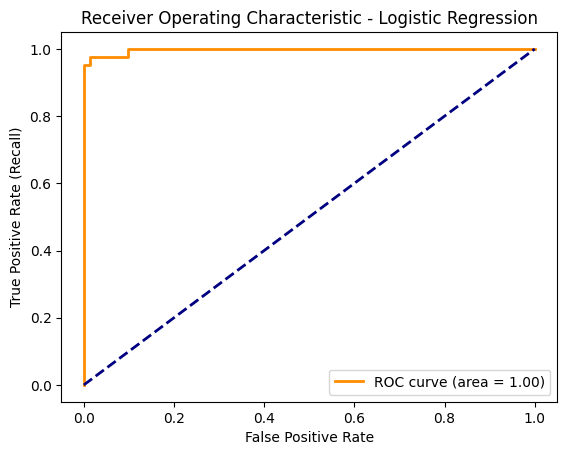

In [36]:
# Ensure y_test labels are numeric (0 and 1)
y_test = y_test.map({'M': 1, 'B': 0}) if y_test.dtype == 'O' else y_test

# Get predicted probabilities
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Compute ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)

# Compute AUC
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

##### Do the same for other models

In [37]:
# Enable probability estimates for SVM
svm = SVC(kernel='linear', probability=True)

In [40]:
svm.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [41]:
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

In [42]:
# Initialize SVM with probability=True
svm = SVC(kernel='linear', probability=True)

# Train the model
svm.fit(X_train, y_train)

# Predict classes
y_pred_svm = svm.predict(X_test)

# Predict probabilities
y_prob_svm = svm.predict_proba(X_test)[:, 1]

ROC Curve

ROC AUC: 0.9963969865705863


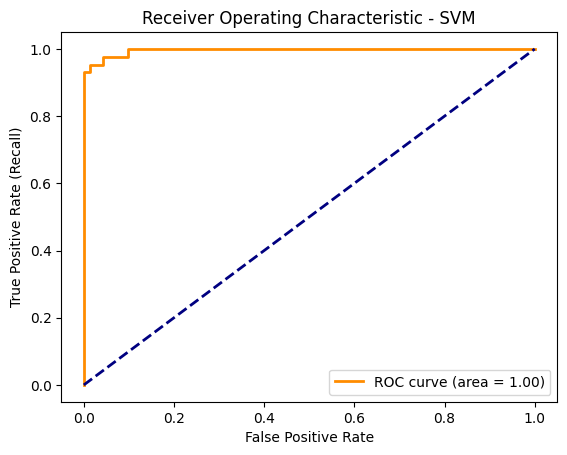

In [43]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
print("ROC AUC:", roc_auc_svm)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr_svm, tpr_svm, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc_svm)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic - SVM")
plt.legend(loc="lower right")
plt.show()